In [1]:
# !pip install tensorflow

In [19]:
## Import Libraries ##
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense

In [3]:
tf.__version__

# pip freeze > requirements.txt

'2.17.0'

In [28]:
## Read Data ##

data = pd.read_csv('Student_performance_data.csv')

# data.shape: (2392, 15)

# drop StudentID and GPA since they don't add value to the model
data = data.drop(['StudentID', 'GPA'], axis=1)

print(data.dtypes)

data.head()

Age                    int64
Gender                 int64
Ethnicity              int64
ParentalEducation      int64
StudyTimeWeekly      float64
Absences               int64
Tutoring               int64
ParentalSupport        int64
Extracurricular        int64
Sports                 int64
Music                  int64
Volunteering           int64
GradeClass           float64
dtype: object


,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,1.0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,4.0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,3.0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,4.0


In [29]:
## Data Prep ##

# features and labels
features = data.iloc[:, 0:-1]
labels = data.iloc[:, -1] ## GradeClass

# one-hot encoding for categorical variables with more than 2 categories
categories = ['Ethnicity', 'ParentalEducation', 'ParentalSupport']
features = pd.get_dummies(features, columns=categories)

# convert one-hot encoded columns to integers
bool_columns = features.select_dtypes(include='bool').columns
features[bool_columns] = features[bool_columns].astype(int)

features.head()

,Age,Gender,StudyTimeWeekly,Absences,Tutoring,Extracurricular,Sports,Music,Volunteering,Ethnicity_0,...,ParentalEducation_0,ParentalEducation_1,ParentalEducation_2,ParentalEducation_3,ParentalEducation_4,ParentalSupport_0,ParentalSupport_1,ParentalSupport_2,ParentalSupport_3,ParentalSupport_4
0,17,1,19.833723,7,1,0,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
1,18,0,15.408756,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
2,15,0,4.210570,26,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,17,1,10.028829,14,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
4,17,1,4.672495,17,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0


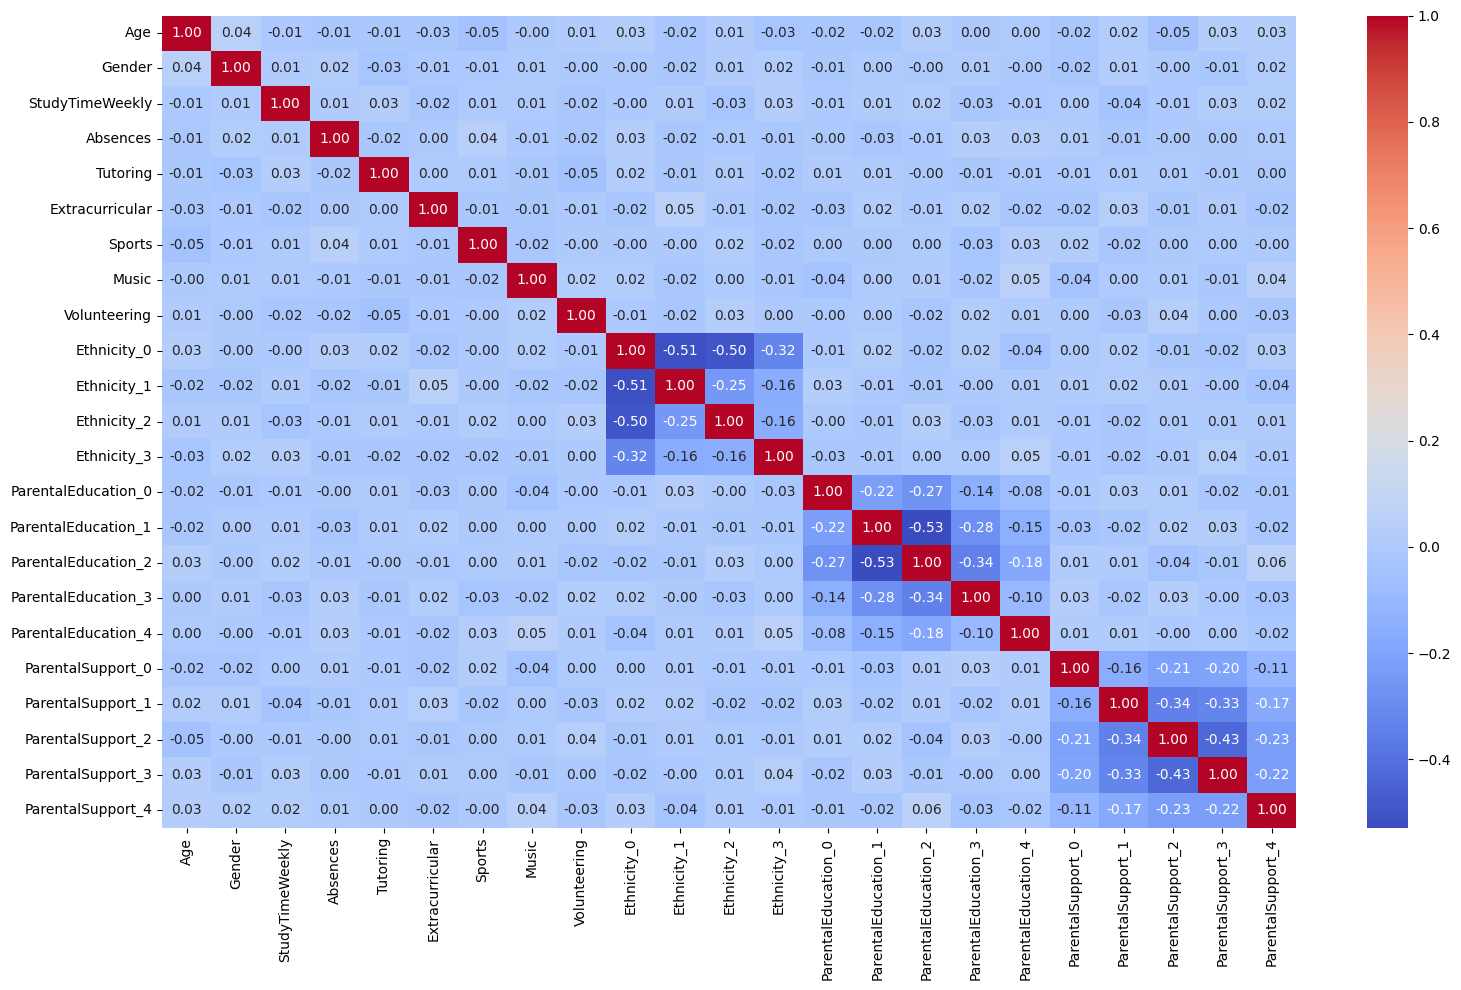

In [30]:
# correlation matrix

plt.figure(figsize=(16, 10))
sns.heatmap(features.corr(), annot=True, cmap='coolwarm', fmt='.2f')
# make it fit
plt.tight_layout()
plt.show()

In [31]:
## Data Prep ##

# split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)